<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/budget_constraint_with_taxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture 
!pip install jaxopt

In [2]:
import jax
import jax.numpy as jnp 
from jaxopt import Bisection
from functools import partial 
from typing import NamedTuple 

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

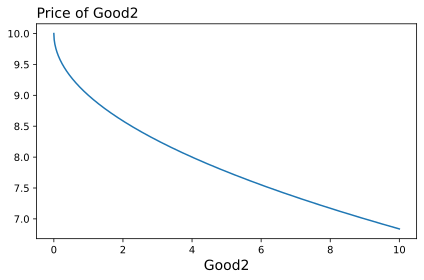

In [4]:
get_price2_consumers = lambda x2: 10.0 - jnp.sqrt(x2)

xs = jnp.linspace(0, 10, 1000)
ys = jax.vmap(get_price2_consumers)(xs)

fig = plt.figure(dpi=300, tight_layout=True)
plt.plot(xs, ys)
plt.title('Price of Good2', loc='left', size=14)
plt.xlabel('Good2', size=14)
fig.savefig('p2.png')
plt.show()

In [5]:
class Taxes(NamedTuple):
  price1_tax: float 
  price2_tax: float 
  income_tax: float 

class Params(NamedTuple):
  """Parameters of the budget constraint"""
  pre_tax_income: float 
  price1_suppliers: float 
  price2_suppliers: float 
  tax: Taxes

class ChoiceVariables(NamedTuple):
  """Bundle of Goods"""
  good1: float 
  good2: float 

def f1(params: Params, good1:float) -> float:
  return (1 + params.tax.price1_tax) * params.price1_suppliers 

def f2(params: Params, good1:float) -> float:
  return params.pre_tax_income * (1 - params.tax.income_tax)

def H(params: Params, good1: float): 
  """Higher Order Implicit Function"""
  price1_consumers = f1(params, good1)
  income_consumers = f2(params, good1)

  def solve(p2_func):
    F = lambda x2: price1_consumers*good1 + get_price2_consumers(x2)*x2 - income_consumers
    bisec = Bisection(optimality_fun=F, lower=0, upper=15)
    good2 = bisec.run().params
    return ChoiceVariables(good1, good2)

  return solve

In [6]:
taxes = Taxes(0.05, 0.05, 0.0)
params = Params(35.0, 10.0, 5.0, taxes)                                      
good1s = jnp.linspace(0, params.pre_tax_income/params.price1_suppliers, 100)                                  